## Decision Tree Classification

Classification is a two-step process; a learning step and a prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response to given data. A Decision tree is one of the easiest and most popular classification algorithms used to understand and interpret data. It can be utilized for both classification and regression problems.

> A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

> The topmost node in a decision tree is known as the root node. 

### Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partitions data in the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature (or attribute) by explaining the given dataset. The best score attribute will be selected as a splitting attribute (Source). I

#### Information Gain
The concept of entropy, which measures the impurity of the input set.

- Entropy is referred to as the randomness or the impurity in a system.
- Information gain is the decrease in entropy.
- ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

 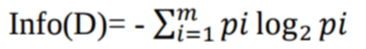
 Where Pi is the probability that an arbitrary tuple in D belongs to class Ci.
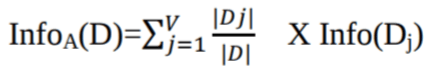
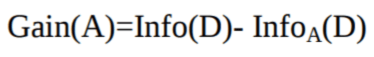

The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().

#### Gini index
Another decision tree algorithm **CART (Classification and Regression Tree)** uses the Gini method to create split points.

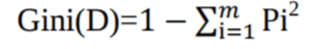

Where pi is the probability that a tuple in D belongs to class Ci.

**The Gini Index considers a binary split for each attribute.** You can compute a weighted sum of the impurity of each partition. 

The attribute with the minimum Gini index is chosen as the splitting attribute.

### Decision Tree Classifier Building in Scikit-learn
#### Importing Required Libraries
Let's first load the required libraries.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#### Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. 

Link - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
pima = pd.read_csv("diabetes.csv",)
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [4]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
df = df.drop(0)

In [6]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [8]:
df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

#### Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [9]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable


#### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function `train_test_split()`. You need to pass three parameters features; target, and test_set size.

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


#### Building Decision Tree Model


In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#### Evaluating the Model

Accuracy can be computed by comparing actual test set values and predicted values.

In [12]:
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.6623376623376623


**We got a classification rate of `67.53%`, which is considered as good accuracy. But we can improve this accuracy by tuning the parameters in the decision tree algorithm.**

For plotting the tree, we need to install `graphviz` and `pydotplus`.

`pip install graphviz`

`pip install pydotplus`

The `export_graphviz function` converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.

In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


#### Optimizing Decision Tree Performance
**criterion : optional (default=”gini”) or Choose attribute selection measure.** This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

**splitter : string, optional (default=”best”) or Split Strategy.** This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depth : int or None, optional (default=None) or Maximum Depth of a Tree.** The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.

In [15]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


Well, the classification rate increased to `77.05%`, which is better accuracy than the previous model.

### Visualizing Decision Trees
Let's make our decision tree a little easier to understand using the following code:

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


InvocationException: GraphViz's executables not found

### Decision Tree Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.